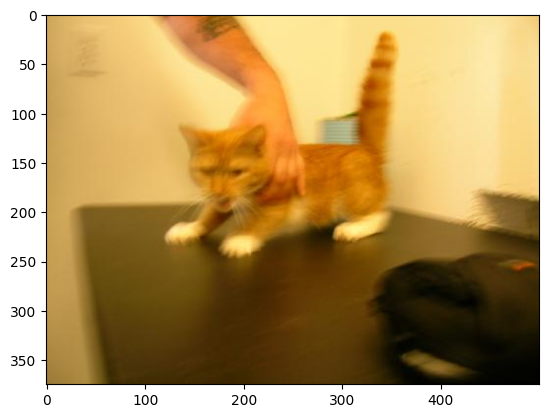

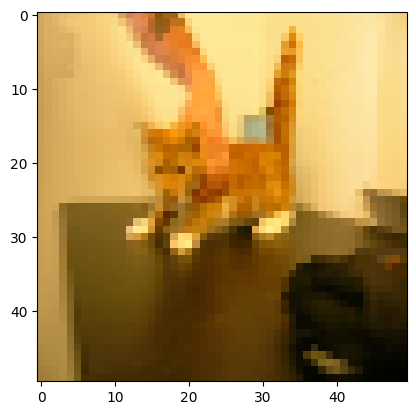

24946
1
1
0
0
1
0
1
1
0
1


c:\Users\vales\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.6146 - loss: 0.6569 - val_accuracy: 0.7391 - val_loss: 0.5381
Epoch 2/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.7452 - loss: 0.5172 - val_accuracy: 0.7780 - val_loss: 0.4881
Epoch 3/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.7869 - loss: 0.4602 - val_accuracy: 0.7896 - val_loss: 0.4511
Epoch 4/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.8114 - loss: 0.4144 - val_accuracy: 0.7940 - val_loss: 0.4509
Epoch 5/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.8264 - loss: 0.3884 - val_accuracy: 0.8080 - val_loss: 0.4296
Epoch 6/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.8390 - loss: 0.3554 - val_accuracy: 0.7760 - val_loss: 0.4902
Epoch 7/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.8567 - loss: 0.3267 - val_accuracy: 0.7988 - val_loss: 0.4389
Epoch 8/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.8654 - loss: 0.3080 - 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# Define data directory and categories
DATADITR = r'C:\Users\vales\OneDrive\Escritorio\kagglecatsanddogs_5340 (1)\PetImages'
CATEGORIES = ['Cat', 'Dog']
IMG_SIZE = 50

# Display one image to check
for category in CATEGORIES:
    path = os.path.join(DATADITR, category)  # path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

# Resize one image to check
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

# Create training data
training_data = []

def creating_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADITR, category)  # path to cats or dogs dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

creating_training_data()
print(len(training_data))

# Shuffle the training data
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

# Separate features and labels
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

# Normalize the data
X = X / 255.0

# Save the data
filepath_X = 'C:/Users/vales/OneDrive/Escritorio/X.pickle'
filepath_y = 'C:/Users/vales/OneDrive/Escritorio/y.pickle'

with open(filepath_X, 'wb') as f:
    pickle.dump(X, f)

with open(filepath_y, 'wb') as f:
    pickle.dump(y, f)

# Load the data in another session/script
with open(filepath_X, 'rb') as f:
    X_loaded = pickle.load(f)

with open(filepath_y, 'rb') as f:
    y_loaded = pickle.load(f)

# Build the model
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

# Train the model
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)